In [2]:
from datetime import datetime
import pickle
from correction.data.train_test_split import find_files
import matplotlib.pyplot as plt
import numpy as np
import pendulum as pdl

In [9]:
pdl.from_timestamp(measurements['Station']['timestamp'][3])

DateTime(2022, 9, 8, 0, 0, 0, tzinfo=Timezone('UTC'))

In [3]:
measurements_file = './stations/station_Chavanga_2022-09-07_2023-08-10.pkl'
station_files = find_files('./stations', '*')
names = []
coords = []
stations = []
for file in station_files:
    with open(file, 'rb') as f:
        measurements = pickle.load(f)
        names.append(measurements['Name'])
        coords.append(measurements['Coords'])
        stations.append(measurements['Station'])
stations = np.array(stations)
coords = np.array(coords)
coords[:, [0, 1]] = coords[:, [1, 0]]

In [8]:
measurements['Station'][3:]

,timestamp,TC,PSFC,WSPD10
3,1.662595e+09,277.750000,758.300000,1.000000
4,1.662599e+09,277.750000,758.266667,1.333333
5,1.662602e+09,277.750000,758.233333,1.666667
6,1.662606e+09,277.750000,758.200000,2.000000
7,1.662610e+09,278.216667,758.200000,2.333333
...,...,...,...,...
8063,1.691611e+09,291.016667,758.200000,4.000000
8064,1.691615e+09,290.350000,758.300000,4.000000
8065,1.691618e+09,289.950000,758.466667,4.333333
8066,1.691622e+09,289.550000,758.633333,4.666667


In [16]:
era_xx = np.load('./metadata/era_xx.npy')
era_yy = np.load('./metadata/era_yy.npy')
wrf_xx = np.load('./metadata/wrf_xx.npy')
wrf_yy = np.load('./metadata/wrf_yy.npy')

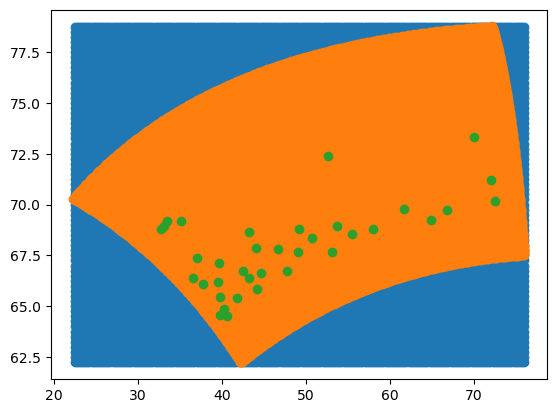

In [17]:
plt.scatter(era_xx, era_yy)
plt.scatter(wrf_xx, wrf_yy)
plt.scatter(coords[:,0], coords[:, 1])

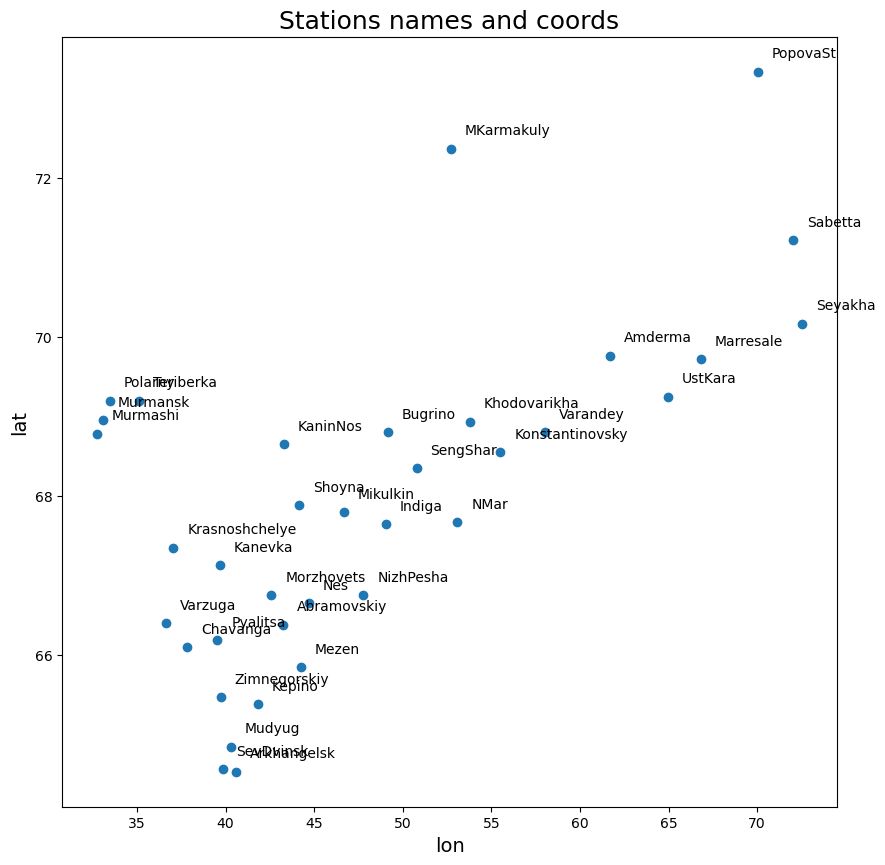

In [18]:
x = coords[:,0]
y = coords[:,1]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('lon', fontsize=14)
ax.set_ylabel('lat', fontsize=14)
ax.set_title('Stations names and coords', fontsize=18)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
#     plt.scatter(x, y, marker='x', color='red')

In [19]:
measurements['Station'].sort_values('timestamp')['timestamp']
datetime.fromtimestamp(measurements['Station']['timestamp'][0]),datetime.fromtimestamp(measurements['Station']['timestamp'][8063])

(datetime.datetime(2022, 9, 8, 0, 0), datetime.datetime(2023, 8, 9, 23, 0))

In [20]:
wrf_folder = 'C:\\Users\\Viktor\\Desktop\\wrf_test'
era_folder = 'C:\\Users\\Viktor\\Desktop\\era_test'

test_file = find_files(wrf_folder, '*')[0]
test_file2 = find_files(era_folder, '*')[0]

# np.load()
import netCDF4
import wrf
with netCDF4.Dataset(test_file, 'r') as ncf:
    var = wrf.getvar(ncf, 'T2', wrf.ALL_TIMES, meta=False)
wrf_tensor = var.data[12]

with netCDF4.Dataset(test_file2, 'r') as ncf2:
    var = wrf.getvar(ncf2, 't2m', wrf.ALL_TIMES, meta=False)
era_tensor = var.data[12]

In [21]:
from scipy.interpolate import LinearNDInterpolator
import numpy as np
import matplotlib.pyplot as plt
bs = np.
grid = list(zip(wrf_xx.flatten(), wrf_yy.flatten()))
interp = LinearNDInterpolator(grid, wrf_tensor.flatten())
Z = interp(coords[:,0], coords[:,1])
Z

array([262.33319216, 257.97212117, 265.75457951, 264.81351046,
       272.10964431, 259.12009232, 263.92246896, 269.37877866,
       264.39800748, 262.42581921, 259.83234054, 258.1533907 ,
       258.93641135, 260.55217203, 264.51483751, 260.54365075,
       265.93836929, 266.52943272, 262.29044946, 258.547502  ,
       260.58172579, 258.94628721, 258.66981023, 266.4597481 ,
       258.99608803, 271.39069028, 257.60554202, 259.95488187,
       267.53774943, 259.30962201, 267.20638249, 270.21129251,
       258.18576594, 258.58962959, 265.3885496 , 269.69303164])

In [26]:
stations_sample = stations[:, :4, [1,3]]
stations_sample.shape

(36, 4, 2)

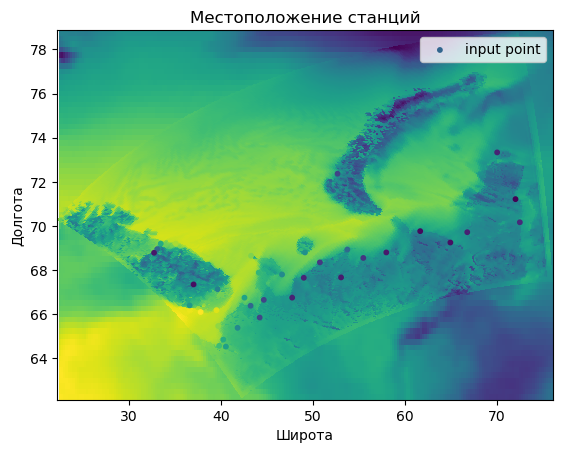

In [23]:
plt.pcolormesh(era_xx, era_yy, era_tensor, shading='auto')

plt.pcolormesh(wrf_xx, wrf_yy, wrf_tensor, shading='auto')
plt.scatter(coords[:,0], coords[:,1], c=Z, s=10,label="input point")
# plt.scatter(coords[:,0], coords[:,1], c='black', s=10,label="stations")
plt.title('Местоположение станций')
plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.legend()